# Prediction of Wine Quality
Following is a detailed notebook that explores the [Wine Quality Dataset](!https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009).
We employ the help of libraries like:
- Pandas
- Seaborn
- Matplotlib
- sklearn<br>
## Content
- Imports and Dataloading
- Data Exploration
- Training of the Prediction Model
- Optimizing for best results

## Imports and Dataloading
We import the requirements to run the model and exploring the dataset.
Once, the imports are made we load the dataset. The dataset <b>Wine Quality Red</b> is a rather small dataset standing at about 100kb and can be easily downloaded rather than creating an API call from the kaggle website.

In [1]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [2]:
# Loading dataset
wine = pd.read_csv('data/winequality-red.csv')

## Data Exploration
We use visualization libraries like Seaborn and Matplotlib to properly get familiar to our dataset.<br>
The dataset itself contains over 1600 rows with columns describing various aspects of Wine Quality such as:
- Fixed Acidity
- Volatile Acidity
- Citric Acid
- Residual Sugar
- Chlorides
- Free Sulfer Dioxide
- Total Sulfer Dioxide
- Density
- pH
- Sulphates
- ALcohol
- Quality

In [3]:
# Information about the columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


### Let us see how different factors seem to affect the quality

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

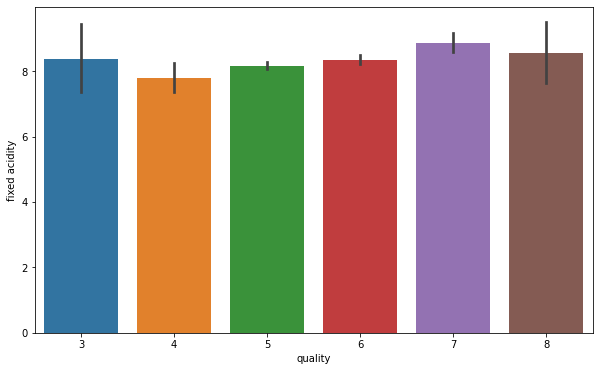

In [4]:
# Fixed Acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

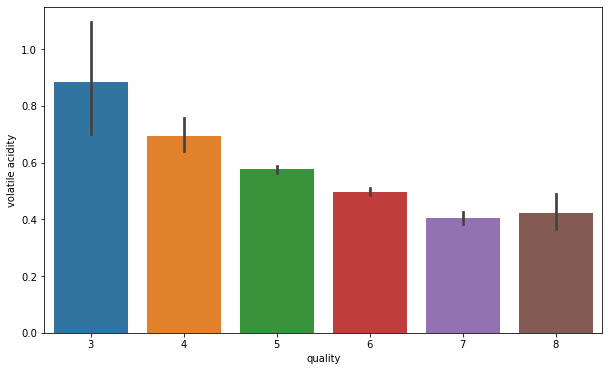

In [5]:
# Volatile Acidity
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

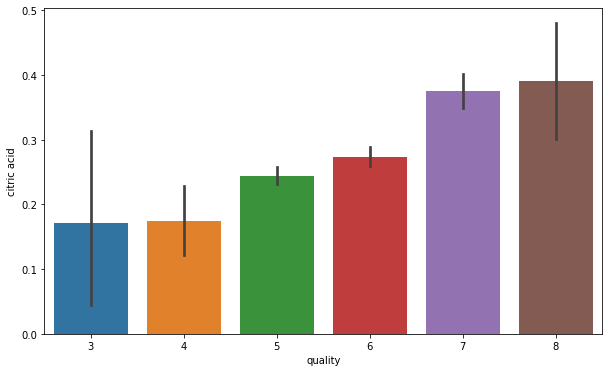

In [6]:
# Citric Acid
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine)

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

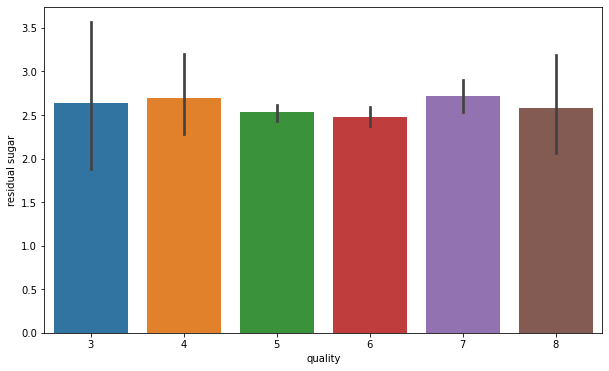

In [7]:
# Residual Sugar
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'residual sugar', data = wine)

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

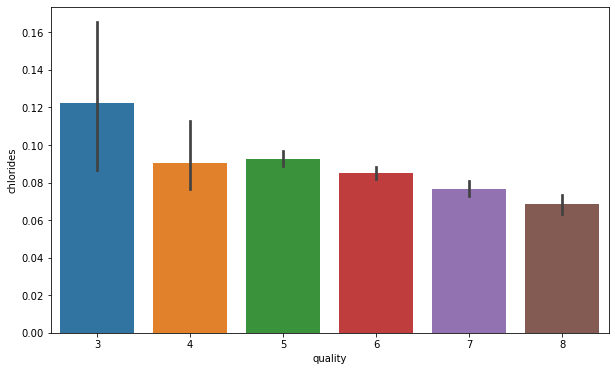

In [8]:
# Chlorides
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'chlorides', data = wine)

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

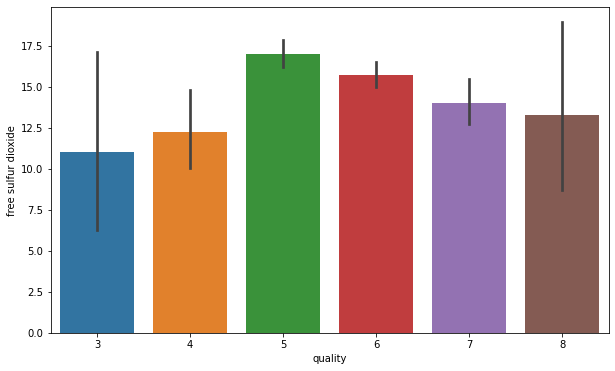

In [9]:
# Free Sulfur Dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'free sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

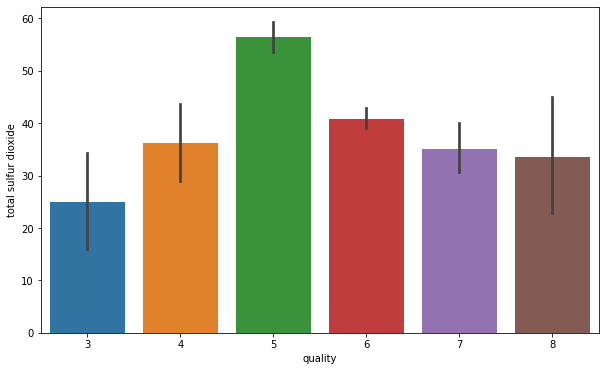

In [10]:
# Total Sulfur Dioxide
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'total sulfur dioxide', data = wine)

<AxesSubplot:xlabel='quality', ylabel='density'>

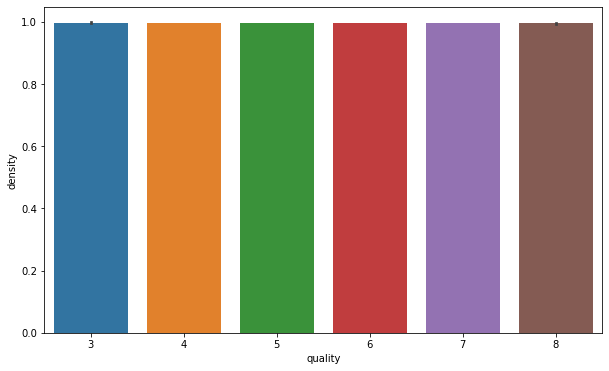

In [11]:
# Density
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'density', data = wine)

<AxesSubplot:xlabel='quality', ylabel='pH'>

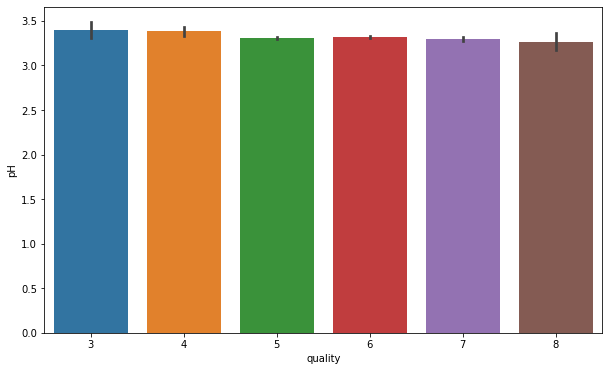

In [12]:
# pH
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'pH', data = wine)

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

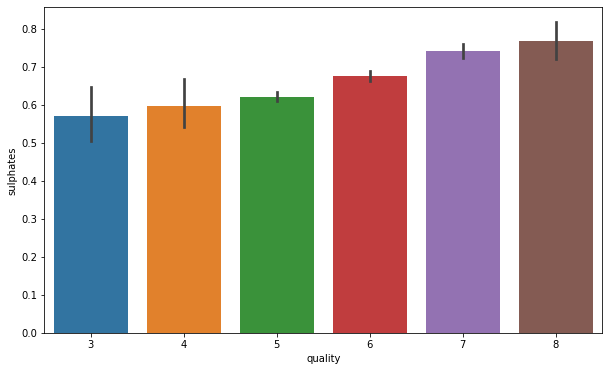

In [13]:
# Sulphates
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'sulphates', data = wine)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

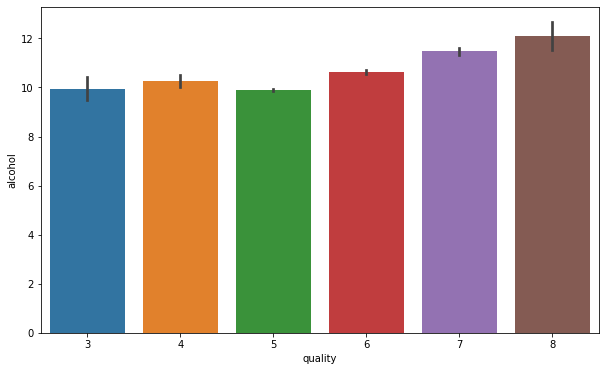

In [14]:
# Alcohol
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'alcohol', data = wine)

## Training
Coming to training the model for <b>Wine Quality Prediction</b> we will be first pre-processing the data and then running 3 different models on the dataset to single out the best result.
The models are as follows:
- Random Forest Classifier
- Stochastic Gradient Descent Classifier
- Support Vector Classifier

### Pre-Processing

In [15]:
# Firstly we will replace the variables "good" and "bad" with 0 and 1 in the last column
# Dividing the good and bad quality rows
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/home/aryan/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

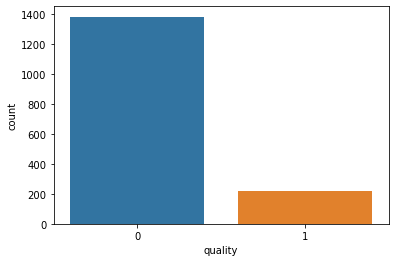

In [16]:
# Visualizing the binary data
sns.countplot(wine['quality'])

In [17]:
# Now we will seperate the quality column from the whole data
X = wine.drop('quality',axis = 1)
y = wine['quality']

In [18]:
# Splitting the dataset into Test and Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [19]:
#Applying Standard scaling to get optimized result
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### Training

#### Random Forest Classifier
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object

In [21]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [22]:
#Let's see how our model performed
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       273
           1       0.68      0.36      0.47        47

    accuracy                           0.88       320
   macro avg       0.79      0.67      0.70       320
weighted avg       0.87      0.88      0.87       320



#### Stochastic Gradient Descent Classifier
Stochastic Gradient Descent (SGD) is a simple yet efficient optimization algorithm used to find the values of parameters/coefficients of functions that minimize a cost function. In other words, it is used for discriminative learning of linear classifiers under convex loss functions such as SVM and Logistic regression.

In [23]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [24]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91       273
           1       0.38      0.21      0.27        47

    accuracy                           0.83       320
   macro avg       0.63      0.58      0.59       320
weighted avg       0.80      0.83      0.81       320



#### Support Vector Classifier
A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems. After giving an SVM model sets of labeled training data for each category, they're able to categorize new text.

In [25]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [26]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       273
           1       0.71      0.26      0.37        47

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320



### Optimizing for Best Resuls
Since Support Vector Classifier fetched us the best results we are going to be using methods to try to get the best results

#### Grid Search
Grid search is a process that searches exhaustively through a manually specified subset of the hyperparameter space of the targeted algorithm. Random search, on the other hand, selects a value for each hyperparameter independently using a probability distribution.

In [27]:
#Finding best parameters for our SVC model
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [28]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [29]:
#Best parameters for our svc model
grid_svc.best_params_

{'C': 1.2, 'gamma': 0.9, 'kernel': 'rbf'}

In [30]:
#Let's run our SVC again with the best parameters.
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf')
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       273
           1       0.89      0.34      0.49        47

    accuracy                           0.90       320
   macro avg       0.89      0.67      0.72       320
weighted avg       0.90      0.90      0.88       320



#### Cross Validation
We will be sing Cross Validation for Random Forest results.<br>
Cross-validation is a resampling procedure used to evaluate machine learning models on a limited data sample. The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation.

In [31]:
#Now lets try to do some evaluation for random forest model using cross validation.
rfc_eval = cross_val_score(estimator = rfc, X = X_train, y = y_train, cv = 10)
rfc_eval.mean()

0.9140194389763779

## Conclusion
We observe that Random Forest Classifier with Cross Validation is able to give us 91.4% accuracy that puts it as the best approach for the prompt.